# Segundo Examen Partial
> **TEICH, Juan Ignacio**

## Ejercicio 1
Una variable aleatoria discreta X puede tomar los valores 0, 1, 2 y 3. Las probabilidades para cada valor posible están dadas por la siguiente tabla:

| X     | 0                     | 1                   | 2                    | 3                       |
|:-----:|:---------------------:|:-------------------:|:--------------------:|:-----------------------:|
| $p$   | $\frac{\theta}{3}$    | $\frac{2\theta}{3}$ | $\frac{1-\theta}{3}$ | $\frac{2(1-\theta)}{3}$ |

Si experiemntalmente se obtienen los siguientes datos:
$$
(2, 1, 3, 2, 1, 0, 1, 3, 1, 2)
$$
determine el valor de $\theta$ usando el método de máxima verosimilitud.

### Resolución
Planteamos la función demáxima verosimilitud para $\theta$:
$$
L(\theta) = \Pi_i f_{X_i}(x_i,\theta)=\left(\frac{\theta}{3}\right) \left( \frac{2\theta}{3}\right)^4 \left(\frac{1-\theta}{3}\right)^3 \left(\frac{2(1-\theta)}{3}\right)^2
$$
Si aplicamos el logarítmo natural a ambos lados de la ecuación:
$$
\ln[L(\theta)] = \ln\left(\frac{\theta}{3}\right) + 4 \ln\left( \frac{2\theta}{3}\right) + 3 \ln\left(\frac{1-\theta}{3}\right) + 2\ln\left[\frac{2(1-\theta)}{3}\right]
$$
$$
\ln[L(\theta)] = \ln(\theta) - \ln(3) + 4[\ln2) +\ln(\theta) - \ln(3)] + 3[\ln(1-\theta) - \ln(3)] + 2[\ln(2) + \ln(1-\theta) - \ln(3)]
$$
Derivamos respecto the $\theta$ e igualamos a 0:
$$
\frac{d \ln[L(\theta)]}{d\theta} = \frac{1}{\theta} + \frac{4}{\theta} + 3 \frac{-1}{1-\theta} + 2 \frac{-1}{1-\theta}
$$
$$
\Longrightarrow  {\color{orange}\theta = \frac{1}{2}}
$$

## Ejercicio 2
Se pretende estimar los valores de producción $Y$ (en miles de toneladas) de cierto material, en función del tiempo transcurrido $X$ (en meses) usando los valores de la tabla:

| X | Y |
|:-:|:-:|
| 4 | 2 |
| 7 | 32|
| 11|149|
| 15|278|
| 24|441|

Se plantea un modelo de la forma $Y=a+b\,x+c\,x^2$. Entontrar los estimadores de mínimos cuadrados para $a$, $b$ y $c$ en este modelo.

### Resolución
Planteamos la función de verosimilitud para cuadrados mínimos:
$$
L(a,b,c)=\sum_i (y_i-\hat{y_i})^2 = \sum_i (y_i - a - b\,x_i - c\,x_i^2)^2
$$
Tomemos la derivada respecto de $a$, $b$ y $c$, e igualemos a 0:
$$
\frac{d\,L(a,b,c)}{da} = 2 \left[ \sum_i (y_i -a -b\,x_i -c\,x_i^2)(-1) \right] = -2 \sum_i y_i + 2\,i\,a + 2\,b\,\sum_i x_i + 2\,c\,\sum_i x_i^2 = 0
$$
$$
\frac{d\,L(a,b,c)}{db} = 2 \left[ \sum_i (y_i -a -b\,x_i -c\,x_i^2)(-x_i) \right] = -2 \sum_i y_i x_i + 2\,a\,\sum_i x_i + 2\,b\,\sum_i x_i^2 + 2\,c\,\sum_i x_i^3 = 0
$$
$$
\frac{d\,L(a,b,c)}{dc} = 2 \left[ \sum_i (y_i -a -b\,x_i -c\,x_i^2)(-x_i^2) \right] = -2 \sum_i y_i x_i^2 + 2\,a\,\sum_i x_i^2 + 2\,b\,\sum_i x_i^3 + 2\,c\,\sum_i x_i^4 = 0
$$
Tenemos entonces un problema lineal de 3 ecuaciones y 3 incógnitas, el cual podemos escribir de forma matricial:
$$
\begin{bmatrix}
    i               & \sum_i x_i    & \sum_i x_i^2 \\
    \sum_i x_i      & \sum_i x_i^2  & \sum_i x_i^3 \\
    \sum_i x_i^2    & \sum_i x_i^3  & \sum_i x_i^4
\end{bmatrix} \cdot
\begin{bmatrix}
    a \\ b \\ c
\end{bmatrix} = 
\begin{bmatrix}
    \sum_i y_i \\ 
    \sum_i y_i x_i \\ 
    \sum_i y_i x_i^2 
\end{bmatrix}
$$
Lo resolvemos a continuación con `numpy`:

In [23]:
import numpy as np

x = [4,7,11,15,24]
y = [2 ,32, 149, 278, 441]

A = np.array([
    [sum([1 for xi in x]),      sum([xi for xi in x]),      sum([xi**2 for xi in x])],
    [sum([xi for xi in x]),     sum([xi**2 for xi in x]),   sum([xi**3 for xi in x])],
    [sum([xi**2 for xi in x]),  sum([xi**3 for xi in x]),   sum([xi**4 for xi in x])],
])
b = np.array([
    sum([yi for yi in y]), sum([yi*xi for xi, yi in zip(x,y)]), sum([yi*(xi**2) for xi, yi in zip(x,y)])
])
abc = np.linalg.inv(A) @ b

print(f"a = {abc[0]}")
print(f"b = {abc[1]}")
print(f"c = {abc[2]}")

a = -126.56976077057467
b = 27.825995159059897
c = -0.16467771109400967


Observamos que obtenemos:
$$
\color{orange}
a = -126.57 \\
b = 27.83 \\
c = -0.16
$$
Grafiquemos los datos contra la predicción:

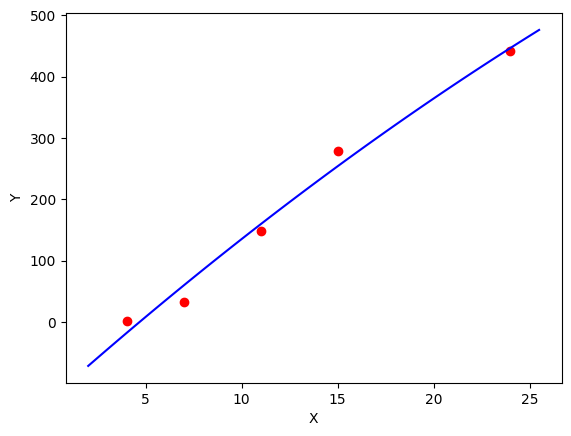

In [24]:
from matplotlib import pyplot as plt

plt.scatter(x,y,color='red')

xTest = np.arange(2,26,0.5)
plt.plot(xTest, [abc[0]+abc[1]*xi+abc[2]*xi**2 for xi in xTest], color='blue')

plt.xlabel("X")
plt.ylabel("Y")

plt.show()

## Ejercicio 3
Don Francisco tiene 5 clientes a los que les ha vendido mercancı́as a crédito y, de ellos, 2 están en mora con el pago prometido. Matı́as, teniendo en cuenta la información disponible, considera que puede modelar el porcentaje $p$ de morosidad según una distribución $\mathcal{B}(2, 5)$. Para determinar los parámetros $\alpha$ y $\beta$, decide usar inferencia bayesiana. Con esto, pretende explicarle a Don Francisco, cómo será el comportamiento de pago de sus clientes a crédito. Determinen la distribución a posteriori del parámetro $p$ de porcentaje de morosidad ($\alpha$ y $\beta$). Determinar su media y su varianza.

### Resolución
Tenemos que nuestra distribución a priori es una distribución Beta, la cual generalizada es de la forma:
$$
\mathcal{B}: f_X(x) = \frac{x^{\alpha-1} (1-x)^{\beta-1}}{\mathcal{B}(\alpha, \beta)}
$$
Entonces nuestra distribución *a priori* es:
$$
\pi(p) = \frac{p (1-p)^{4}}{\mathcal{B}(2, 5)}
$$
La *verosimilitud* a partir de los datos experimentales tiene forma binomial:
$$
L(p) = p^2 (1-p)^5
$$
Luego la distribución *a posteriori* viene dada por:
$$
f_p(p) \propto \pi(p) \, L(p) \propto [p (1-p)^{4}] [p^2 (1-p)^5] = p^3 (1-p)^7
$$
Recordando la forma de la distribución Beta obtenemos:
$$
\color{orange}
\alpha = 4\\
\beta = 8
$$

La media de la distribución Beta viene dada por:
$$
\mu_\mathcal{B} = \frac{\alpha}{\alpha \beta} \Longrightarrow {\color{orange} \mu_p = 0.125}
$$
Y la varianza:
$$
{\sigma^2}_\mathcal{B} = \frac{\alpha\beta}{(\alpha + \beta)^2 (\alpha + \beta + 1)} \Longrightarrow {\color{orange} {\sigma^2}_p = 0.01709}
$$